## Defs

Could probs move to helper file...

In [1]:
from discopy.quantum.zx import Spider, Id
from discopy import tensor, Tensor, Dim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)


class Z2(Spider):
    """ Z spider. """
    def __init__(self, n_legs_in, n_legs_out, phase=0):
        super().__init__(n_legs_in, n_legs_out, phase, name='Z')
        self.color = "green"

    @property
    def array(self):
        n, m = len(self.dom), len(self.cod)
        array = np.zeros(1 << (n + m), dtype=complex)
        array[0] = 1
        array[-1] = np.exp(1j * self.phase)
        return Tensor(Dim(2) ** n, Dim(2) ** m, array)

In [2]:
from discopy.quantum.zx import Functor
import tensornetwork as tn


def f_ob(ob):
    return Dim(2) ** len(ob)

def f_ar(box):
    return tensor.Box(box.name, f_ob(box.dom), f_ob(box.cod), box.array)

f = Functor(ob=f_ob, ar=f_ar, ar_factory=tensor.Diagram)

def eval(diagram):
    d = Functor(ob=f_ob, ar=f_ar, ar_factory=tensor.Diagram)(diagram)
    t = d.eval(contractor=tn.contractors.auto)
    
    n, m = len(diagram.dom), len(diagram.cod)
    #print(n, m, "\n")
    
    return t.array.astype(float).reshape(2**n, 2**m).transpose()
    #return t.array.astype(float).reshape(dim, dim).transpose()

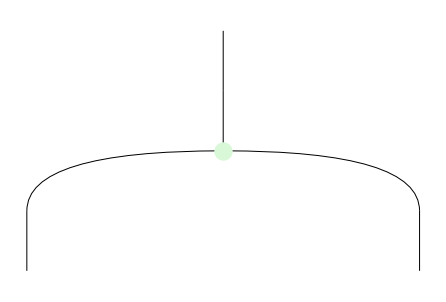

/tmp/ipykernel_3188299/3578117760.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return t.array.astype(float).reshape(2**n, 2**m).transpose()


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [3]:
Z2(1, 2).draw()
eval(Z2(1, 2))

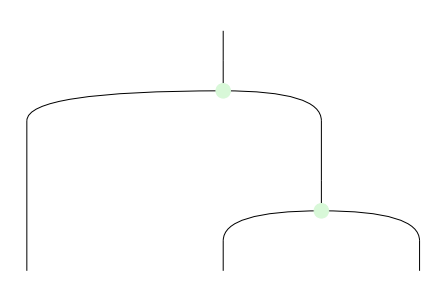

In [4]:
a = Z2(1, 2) >> Z2(1, 2) @ Id(1)
b = Z2(1, 2) >> Id(1) @ Z2(1, 2)
b.draw()

In [5]:
(eval(a) == eval(b)).all(), (eval(b) == eval(Z2(1, 3))).all()

/tmp/ipykernel_3188299/3578117760.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return t.array.astype(float).reshape(2**n, 2**m).transpose()


(True, True)

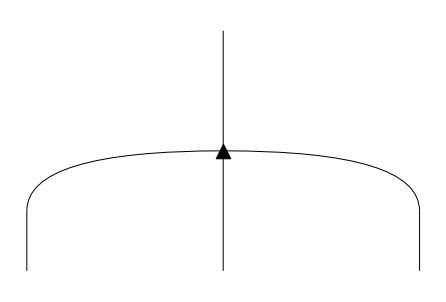

In [7]:
def one_hots(n):
    zeros = '0'*n
    strings = []
    for i in range(n):
        strings.append('0'*i + '1' + '0'*(n-i-1))
    return strings

class W(Spider):
    def __init__(self, n_out=2):
        super().__init__(1, n_out) # assume 1 in for now 
        self.color = "black" 
        self.shape = "triangle_up"
        
    @property
    def array(self):
        # |0..0><0| + (|10..> + |01..> + ...)<1|
        n = len(self.cod)
        array = np.zeros((2**n, 2))
        array[0][0] = 1 # top row |00..>
        for j in one_hots(n):
            array[int(j, 2)][1] = 1 #1 for every index of 1 one hot index
        
        #print(len(self.dom), len(self.cod), "\n", array)
        
        array = np.zeros(2 ** (1 + n))
        array[0] = 1.0
        for j in one_hots(n):

            array[2**n + int(j, 2)] = 1
        
        return Tensor(Dim(2), Dim(2)**n, array)
    
W(3).draw()   

In [9]:
n = 2
array = np.zeros(2 ** (1 + n))
array[0] = 1.0
for j in one_hots(n):
    print(int(j, 2))
    array[2**n + int(j, 2)] = 1

, array.reshape(2, 2**n)

2
1


(array([1., 0., 0., 0., 0., 1., 1., 0.]),
 array([[1., 0.],
        [0., 0.],
        [0., 1.],
        [1., 0.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 1., 0.]]))

In [8]:
eval(W(3))

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [12]:
n = 4
array = np.zeros(2 ** (1 + n))
array[0] = 1.0
for j in one_hots(n):
    print(int(j, 2))
    array[2 * int(j, 2) + 1] = 1
    
array, array.reshape(2**n, 2)

8
4
2
1


(array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]))

## Rules

### W swaps

In [9]:
# how do swap diagramatically?
swap = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
(swap @ eval(W(2)) == eval(W(2))).all()

True

### W fusion

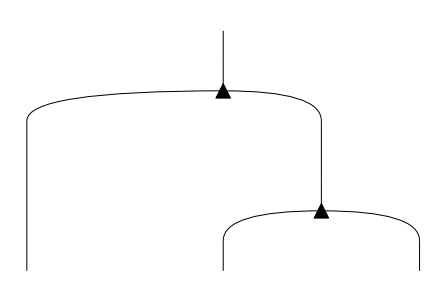

In [10]:
d = W(2) >> Id(1) @ W(2)
d.draw()

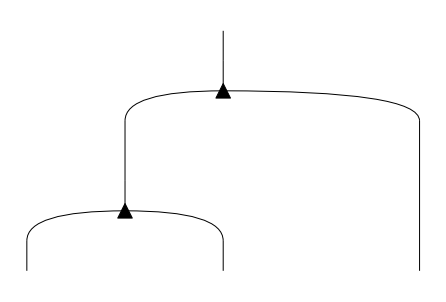

In [11]:
d2 = W(2) >> W(2) @ Id(1)
d2.draw()

In [12]:
eval(W(3))

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
eval(d)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
eval(d2)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [15]:
(eval(d) == eval(d2)).all()

True